In [ ]:
TASK 1:
Your boss wants to know how electricity prices in NO2 and Germany have developed over the 
sample period. Therefore, she has asked you to create a line plot that visualizes the hourly 
electricity price in NO2 and Germany. The graph should: 
- consist of two subplots: 
o The first subplot shows the hourly electricity price in NO2 over time. 
o The second subplot shows the hourly electricity price in Germany over time. 
- add a vertical line to each subplot to indicate the official opening of Nordlink (December 
9, 2020).  
- be stored as a png file called “figure_task1.png”. 

What is your conclusion? How has the electricity price in NO2 and Germany developed over 
time? Have the prices increased or decreased after the opening of Nordlink? Extra: Do you have 
any suggestions for why we sometimes observe negative electricity prices?

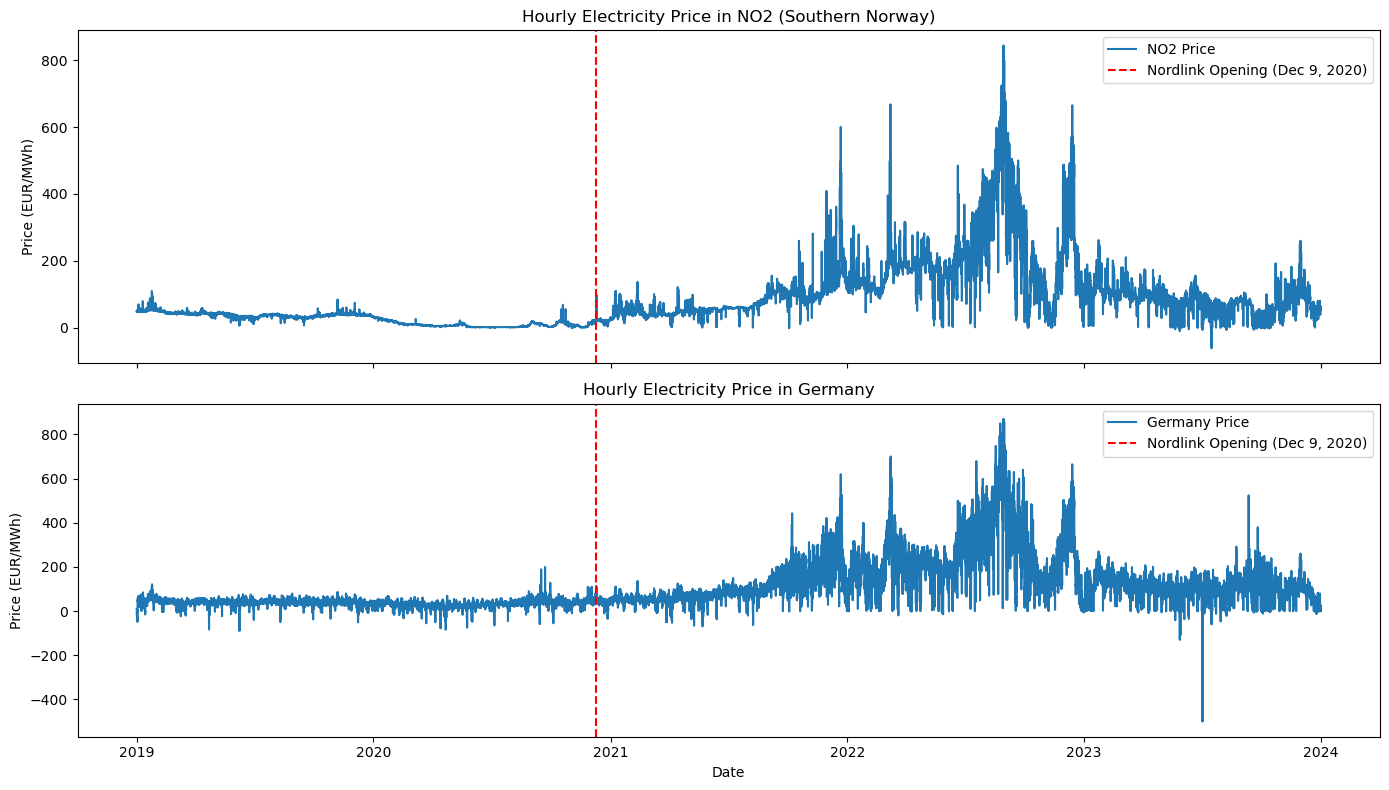

In [ ]:
# Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import glob

DATA_PATH = './data/DayAheadPrices_12.1.D'

pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv'

# Loop through each file, read it into a DataFrame, and store it in a list

data = []

for file in glob.glob(pattern):
    df = pd.read_csv(file, sep = '\t', parse_dates= ['DateTime'])
    data.append(df)

# Combine all files into a single DataFrame

df= pd.concat(data, axis = 0)

# Filter data to keep only hourly (PT60M) records for Southern Norway (NO2) and Germany (DE_LU) 
df_filtered = df.query("MapCode in ['NO2', 'DE_LU'] and ResolutionCode == 'PT60M'")

# Reshape data to create separate columns for each price zone and rename columns for clarity
df_reshaped = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')

df_reshaped.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_reshaped.columns]

# Step 1: Filter Data
df_filtered = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]

# Step 2: Reshape Data
df_pivot = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')
df_pivot.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_pivot.columns]

# Step 3: Define Nordlink opening date
nordlink_opening_date = pd.to_datetime('2020-12-09')

# Step 4: Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot NO2 Price with Nordlink opening marker
ax1.plot(df_pivot.index, df_pivot['NO2 Price'], label='NO2 Price')
ax1.axvline(nordlink_opening_date, color='red', linestyle='--', label='Nordlink Opening (Dec 9, 2020)')
ax1.set_title('Hourly Electricity Price in NO2 (Southern Norway)')
ax1.set_ylabel('Price (EUR/MWh)')
ax1.legend()

# Plot Germany Price with Nordlink opening marker
ax2.plot(df_pivot.index, df_pivot['Germany Price'], label='Germany Price')
ax2.axvline(nordlink_opening_date, color='red', linestyle='--', label='Nordlink Opening (Dec 9, 2020)')
ax2.set_title('Hourly Electricity Price in Germany')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price (EUR/MWh)')
ax2.legend()

# Final adjustments and save the figure
fig.tight_layout()
plt.savefig('figure_task1.png')
plt.show()

